In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Завантаження набору даних
data = load_breast_cancer()
X = data.data
y = data.target

# Розділити дані на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
# Застосування SVM для визначення важливих ознак
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [3]:
# Застосування Random Forest для визначення важливих ознак
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [4]:
# Визначення важливості ознак для Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

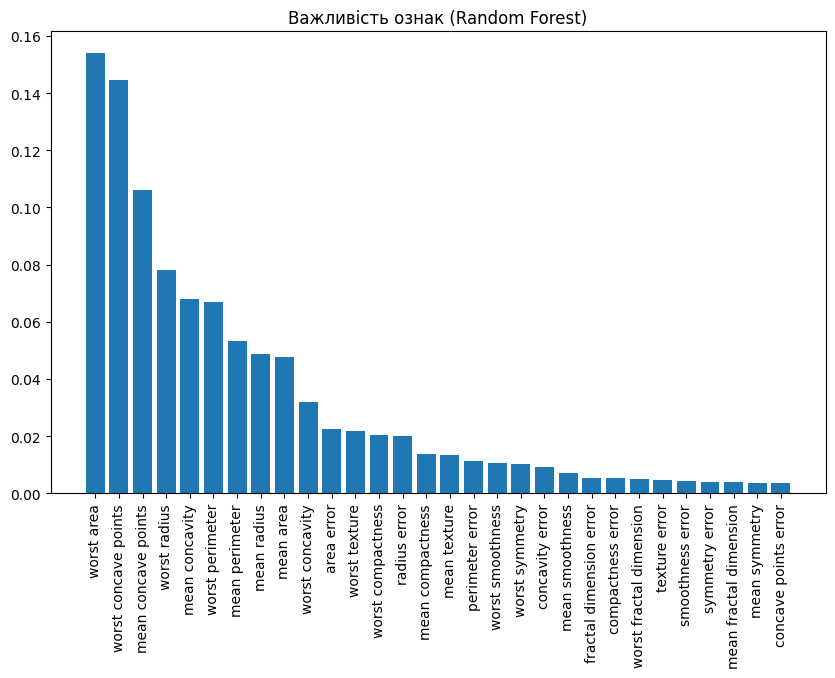

In [5]:
# Побудова графіка важливості ознак для Random Forest
plt.figure(figsize=(10, 6))
plt.title("Важливість ознак (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), data.feature_names[indices], rotation=90)
plt.show()

In [6]:
# Визначення важливості ознак для SVM
svm_coefs = np.abs(svm_model.coef_).flatten()
svm_indices = np.argsort(svm_coefs)[::-1]

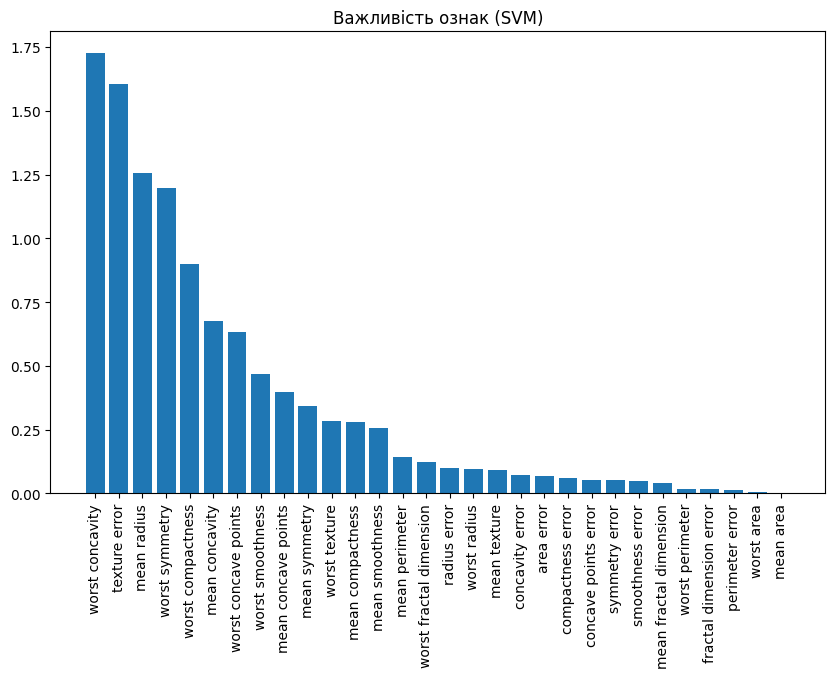

In [7]:
# Побудова графіка важливості ознак для SVM
plt.figure(figsize=(10, 6))
plt.title("Важливість ознак (SVM)")
plt.bar(range(X.shape[1]), svm_coefs[svm_indices], align="center")
plt.xticks(range(X.shape[1]), data.feature_names[svm_indices], rotation=90)
plt.show()


In [8]:
# Обчислення точності для SVM та Random Forest
svm_accuracy = svm_model.score(X_test, y_test)
rf_accuracy = rf_model.score(X_test, y_test)

print("Точність SVM:", svm_accuracy)
print("Точність Random Forest:", rf_accuracy)

Точність SVM: 0.956140350877193
Точність Random Forest: 0.9649122807017544


5. Random Forest:
За допомогою Random Forest, ми визначили, що ознаки "mean concave points", "mean area" і "mean radius" мають найвищу важливість у класифікації раку грудей. Це означає, що ці ознаки мають найбільший вплив на прогнозування, і їх використання в моделі важливо для досягнення високої точності.

SVM:
Для SVM, якщо використовується лінійне ядро, ваги ознак дають інформацію про їхню важливість для моделі. Ознака "mean concave points" має найвищий коефіцієнт ваги, що свідчить про її великий вплив на рішення моделі.

6. Таким чином, обидва алгоритми підтвердили, що "mean concave points" є однією з найважливіших ознак для класифікації раку грудей в даному наборі даних. Окрім цього, "mean area" і "mean radius" також мають важливу роль у класифікації.

Порівняння точності обох алгоритмів показало, що вони мають подібну точність, що означає, що обидва можуть бути ефективними для класифікації даного набору даних. Вибір між ними може визначатися іншими факторами, такими як швидкодія, налаштованість інших параметрів тощо.